In [1]:
import numpy as np
import pandas as pd
import numpy as np
import datetime
from datetime import date
from pandas.tseries.offsets import *

<br>
Purpose: show that markets and the economy are completely divorced and have been for well over a decade.
<br><br>
Conclusion: markets are highly inflationary.
<br>
<h1>The Federal Reserve's Mandate</h1>
<br>
Section 2A of the Federal Reserve Act mandates that the Federal Reserve <a href="https://www.federalreserve.gov/aboutthefed/section2a.htm" target="_blank">maintains stable prices.</a>


As such, indicators must be used to measure price stability - the Federal Reserve has decided the Consumer Price Index (CPI) is the defacto measure of inflation and price stability

Note that asset prices are not a factor of CPI, so asset price inflation is completely ignored in the Fed's targets

<h3>What is inflation</h3>
<br>
<img src="inflation_definition.png" alt="Inflation Definition" style="width:33%;float:left;">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
Source: New Webster Encyclopedic Dictionary of the English Language.<br>Copyright 1971*
<br>
<br>
<br>
So inflation is an expansion in the supply of money/credit.
<br>
But the Federal Reserve has actually changed the definition of the word: "<a href="https://www.federalreserve.gov/faqs/economy_14419.htm" target="_blank">Inflation is the increase in the prices of goods and services over time.</a>"
<br>
<br>
And this is a common theme with the Federal Reserve - they consistently change definitions to fit their narrative (inflation, GDP, employment, unemployment)

We know that prices should be naturally deflationary as a result of technological advancements.
<br>
Though, the Fed believes that deflation is detrimental to economic growth. 
<br>This became the clear public narrative largely when Bernanke took office in 2006 and used his university models of how M2 and real interest rates affected the Great Depression.

Yet, even when the Federal Reserve uses their own made up meaning for inflation (price inflation), it's still wrong by it's own definition because it doesn't take the 'would be' price decreases into account in any way.
<h3>Real price inflation is actually observed inflation + lost unobservable deflation.</h3>
<br>
A toy example

Suppose the seasonally adjusted price of a loaf of bread was \\$3.00 in 2019. 
Also suppose that, absent the Fed's staunch currency creation, the seasonally adjusted price of the same loaf would fall to \\$2.75 in 2020. 
This would be great for consumers because bread has become 8.3% cheaper for them.

Now, suppose the Fed's staunch currency creation causes the loaf to instead move from \\$3.00 to \\$3.06
The Fed would tell you they acheived a target inflation of 2%. 
In reality, inflation would actually be (\\$3.06 - \\$2.75) / \\$3.00 or 10.3% of lost purchasing power from the people.

It seems a bit silly for this to be the primary goal of the most powerful institution on the planet. But realize that asset prices are subject to this same inflation through currency creation and, more powerfully, they move with some P/E multiple. 


<h1>Let's take a look at the money supply (M2)</h1>

In [8]:
# read in money supply
m2 = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=M2&scale=left&cosd=1980-11-03&coed=2020-05-04&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Weekly%2C%20Ending%20Monday&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2020-05-16&revision_date=2020-05-16&nd=1980-11-03", index_col = "DATE", parse_dates=['DATE'])

# remove rows with missing data
m2 = m2.dropna()
m2 = m2[m2.M2 != '.']

# make the data usable for calculations and charting
m2['M2'] = m2['M2'].astype(float)
m2 = m2.resample('1D').interpolate() 

# read in money supply
m1 = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=M1&scale=left&cosd=1975-01-06&coed=2020-08-03&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Weekly%2C%20Ending%20Monday&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-08-14&revision_date=2020-08-14&nd=1975-01-06", index_col = "DATE", parse_dates=['DATE'])

# remove rows with missing data
m1 = m1.dropna()
m1 = m1[m1.M1 != '.']

# make the data usable for calculations and charting
m1['M1'] = m1['M1'].astype(float)
m1 = m1.resample('1D').interpolate() 


In [3]:
m2['diff'] = m2['M2'] - m1['M1']

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, YearLocator
import matplotlib.patches as mpatches

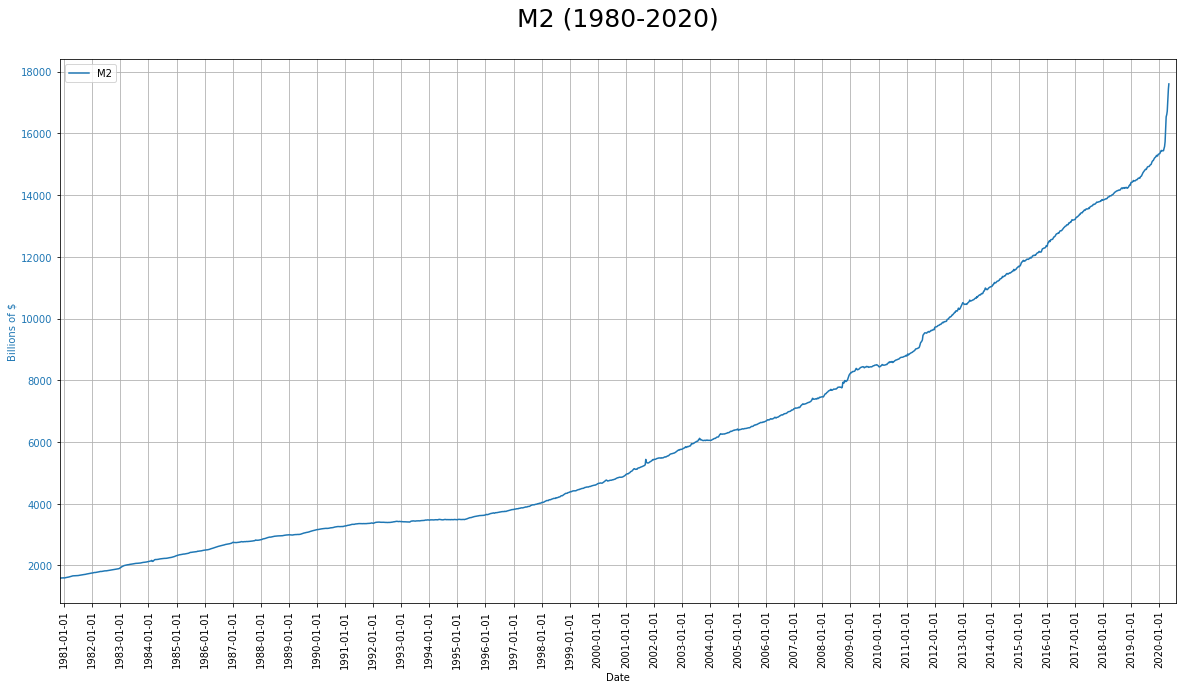

In [9]:
# ADD CHART TITLE

fig, ax1 = plt.subplots(1,1, figsize = (20, 10))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.set_ylabel('Billions of $', color=color)
ax1.plot(m2.index, m2['M2'], color=color, label="M2")
ax1.tick_params(axis='y', labelcolor=color)

yloc = YearLocator(1, month=1, day=1)
ax1.xaxis.set_major_locator(yloc)
ax1.grid(True)

ax1.set_xlim([datetime.date(1980, 11, 3), datetime.date(2020, 8, 1)])

lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc="upper left")

plt.xticks(rotation=90)
plt.title('M2 (1980-2020)\n', fontsize=25)

plt.show()

<h3>This is inflation</h3>

In [10]:
sp = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1598054400&interval=1d&events=history", index_col = "Date", parse_dates=['Date'])

sp = sp.dropna()
sp = sp[sp['Close'] != '.']

sp['Close'] = sp['Close'].astype(float)

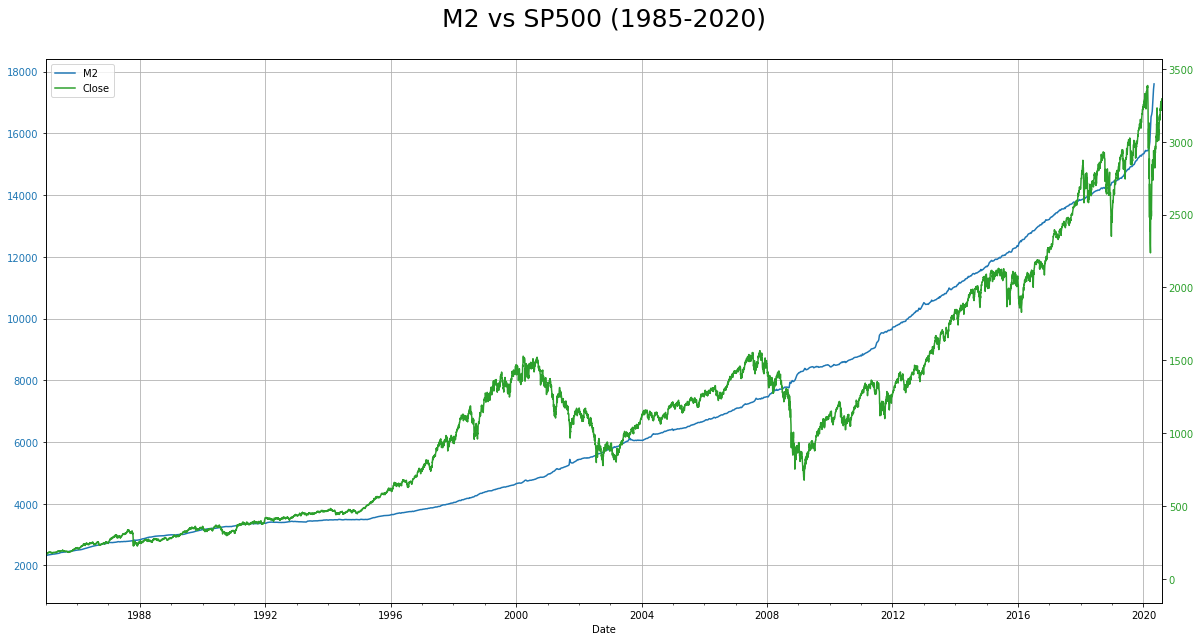

In [11]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 10))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax1.plot(m2.index, m2['M2'], color=color, label="M2")
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(sp.index, sp['Close'], color=color, label="Close")
ax2.tick_params(axis='y', labelcolor=color)

yloc = YearLocator(1, month=1, day=1)
ax1.xaxis.set_minor_locator(yloc)
ax1.grid(True)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

ax1.set_xlim([datetime.date(1985, 1, 1), datetime.date(2020, 8, 1)])

plt.xticks(rotation=90)
plt.title('M2 vs SP500 (1985-2020)\n', fontsize=25)
plt.show()

With such inflation in circulating currency, one should not be surprised that the markets inflate as well.
Yet no one has ever heard such an idea from their favorite financial news network...

Wait. Surely with such technological advancements as seen in the last 50 years, the market should significantly outperform inflation (remember, real inflation is money/credit supply. It is not the CPI which does not include asset inflation or lost deflation).

Let's take a look at the S&P 500 in terms of real money (gold) instead of paper

In [12]:
gld = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GOLDAMGBD228NLBM&scale=left&cosd=1968-04-01&coed=2020-07-17&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-07-20&revision_date=2020-07-20&nd=1968-04-01", index_col = "DATE", parse_dates=['DATE'])

gld = gld.dropna()
gld = gld[gld.GOLDAMGBD228NLBM != '.']

gld['GOLDAMGBD228NLBM'] = gld['GOLDAMGBD228NLBM'].astype(float)
#gld

In [13]:
merge = pd.merge(sp, gld, how='inner', left_index=True, right_index=True)
merge['ratio'] = gld['GOLDAMGBD228NLBM'] / sp['Close']
#merge

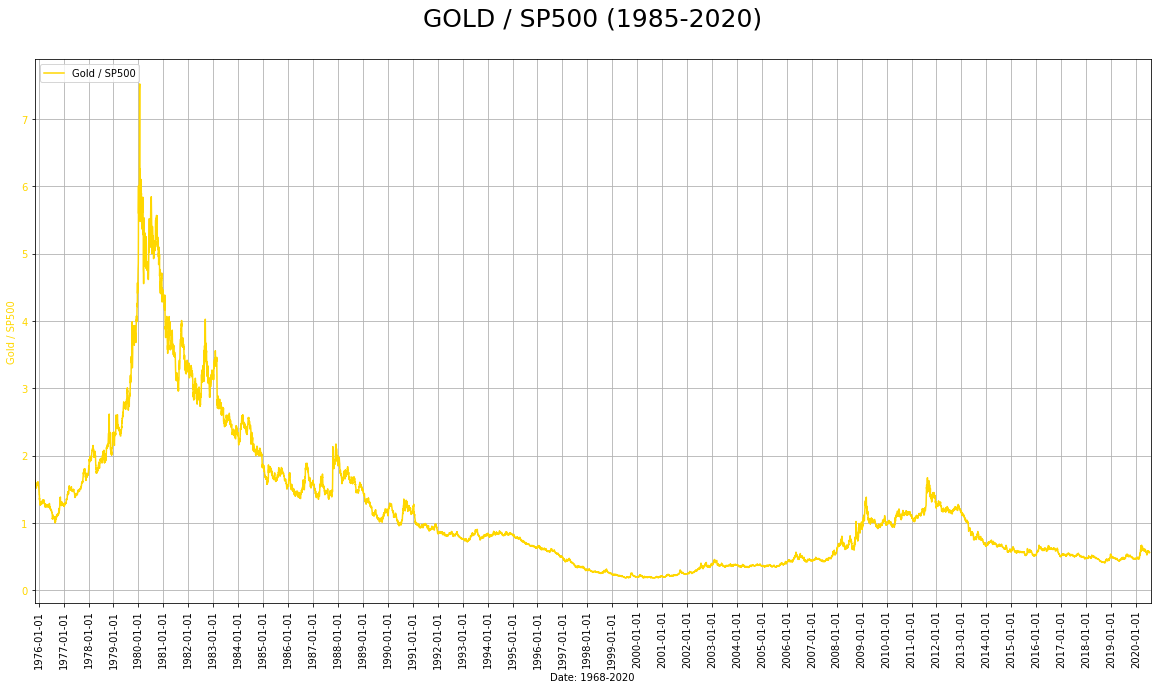

In [14]:
# ADD CHART TITLE

fig, ax1 = plt.subplots(1,1, figsize = (20, 10))

color = 'gold'
ax1.set_xlabel('Date: 1968-2020')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.set_ylabel('Gold / SP500', color=color)
ax1.plot(merge.index, merge['ratio'], color=color, label="Gold / SP500")
ax1.tick_params(axis='y', labelcolor=color)

yloc = YearLocator(1, month=1, day=1)
ax1.xaxis.set_major_locator(yloc)
ax1.grid(True)

ax1.set_xlim([datetime.date(1975, 11, 3), datetime.date(2020, 8, 1)])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines, labels, loc="upper left")

plt.title('GOLD / SP500 (1985-2020)\n', fontsize=25)
plt.xticks(rotation=90)
plt.show()

In terms of real money (gold), the price of stocks is lower than it was 45 years ago

Note that this chart does not reinvest the 1-2% SP500 dividend for small compound growth.
There is also some industrial use for gold which props demand up some.

<h4>Still, it is clear that we have reached a level of real inflation that dwarf's company growth to the point that the market merely tracks inflation</h4>

<h2>The Proof is in the (economic) Poison</h2>

In [15]:

m2v = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=445&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=670&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=M2V,CPIAUCSL&scale=right,left&cosd=1959-01-01,1947-01-01&coed=2020-04-01,2020-07-01&line_color=%234572a7,%23aa4643&link_values=false,false&line_style=solid,solid&mark_type=none,none&mw=1,1&lw=2,2&ost=-99999,-99999&oet=99999,99999&mma=0,0&fml=a,a&fq=Quarterly,Quarterly&fam=avg,avg&fgst=lin,lin&fgsnd=2020-02-01,2020-02-01&line_index=1,2&transformation=lin,pc1&vintage_date=2020-08-14,2020-08-14&revision_date=2020-08-14,2020-08-14&nd=1959-01-01,1947-01-01", index_col = "DATE", parse_dates=['DATE'])

m2v = m2v.dropna()
m2v = m2v[m2v.M2V != '.']
m2v = m2v[m2v.CPIAUCSL_PC1 != '.']

m2v['M2V'] = m2v['M2V'].astype(float)
m2v['CPIAUCSL_PC1'] = m2v['CPIAUCSL_PC1'].astype(float)


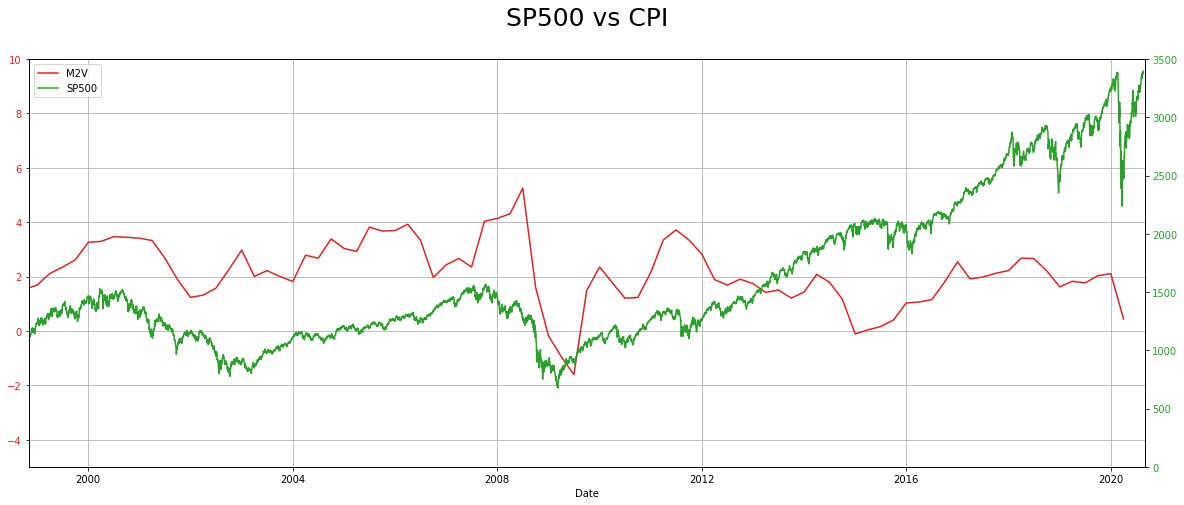

In [16]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 7.5))

ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
ax1.plot(m2v.index, m2v['CPIAUCSL_PC1'], color=color, label='M2V')
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2.plot(sp.index, sp['Close'], color=color, label='SP500')
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_ylim(-5, 10)
ax2.set_ylim(0, 3500)
ax1.grid(True)

ax1.set_xlim([datetime.date(1998, 11, 3), datetime.date(2020, 9, 1)])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.title('SP500 vs CPI\n', fontsize=25)
plt.xticks(rotation=90)
plt.show()

<h1>Metrics that may have an effect on CPI.</h1>

<h3>I. Falling Money Velocity (M2V) puts downward pressure on CPI</h3>

The ratio of nominal GDP to M2 is called money velocity (M2V)

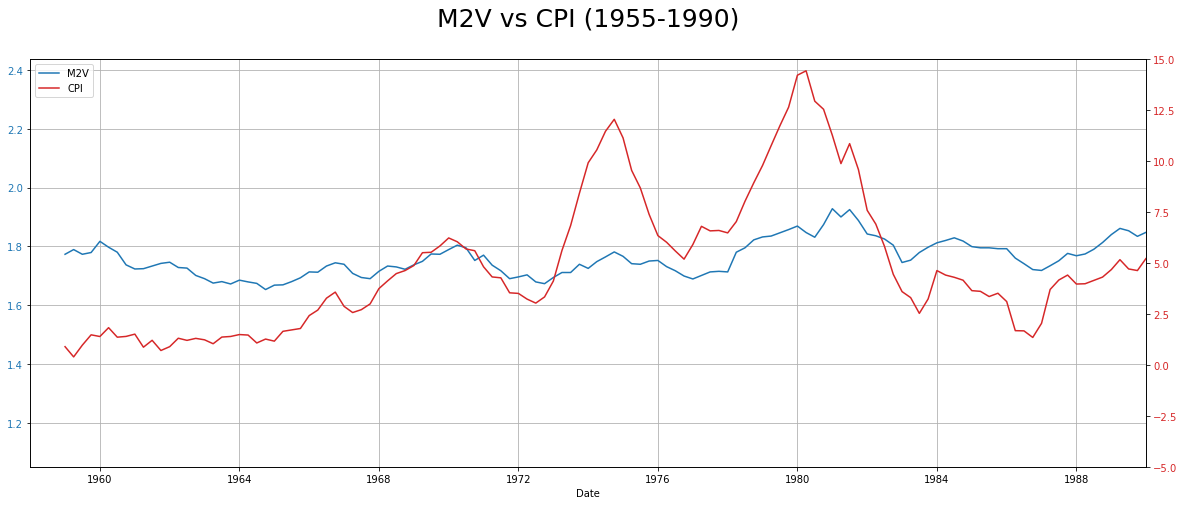

In [17]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 7.5))


ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax1.plot(m2v.index, m2v['M2V'], color=color, label="M2V")
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax2.plot(m2v.index, m2v['CPIAUCSL_PC1'], color=color, label="CPI")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_ylim(1.05, 2.437)
ax2.set_ylim(-5, 15)

ax1.grid(True)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

ax1.set_xlim([datetime.date(1958, 1, 1), datetime.date(1990, 1, 1)])
plt.title('M2V vs CPI (1955-1990)\n', fontsize=25)
plt.xticks(rotation=90)
plt.show()

M2V and CPI are highly correlated and falling M2V puts downward pressure on CPI
<br>
This should make sense fundamentally because GDP isn't keeping up with the growth in M2, which likely means consumer demand is lower

<h3>II. Rising Money Supply (M2) puts upward pressure on CPI</h3>

In [18]:
#TODO adjust this?
m2YoY = m2.copy()
m2YoY['M2PushBack'] = m2YoY.M2.shift(-252)

m2YoY['YoY'] = ( m2YoY['M2PushBack'] - m2YoY['M2'] ) / m2YoY['M2']
m2YoY['YoY'] = m2YoY['YoY'] * m2YoY['M2']*0.001
m2YoY['YoY'] = m2YoY['YoY'].shift(252)

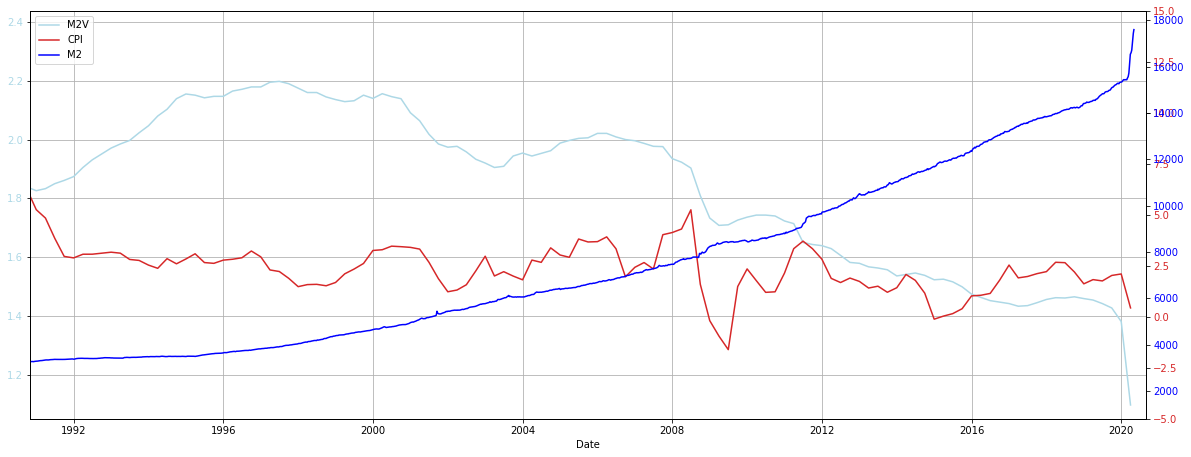

In [19]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 7.5))

ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()

color = 'lightblue'
ax1.plot(m2v.index, m2v['M2V'], color=color, label="M2V")
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax2.plot(m2v.index, m2v['CPIAUCSL_PC1'], color=color, label="CPI")
ax2.tick_params(axis='y', labelcolor=color)

color = 'blue'
ax3.plot(m2.index, m2['M2'], color=color, label="M2")
ax3.tick_params(axis='y', labelcolor=color)

ax1.set_ylim(1.05, 2.437)
ax2.set_ylim(-5, 15)
ax1.grid(True)

ax1.set_xlim([datetime.date(1990, 11, 3), datetime.date(2020, 9, 1)])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc="upper left")

plt.xticks(rotation=90)
plt.show()

Manipulation of M2 though any of the many Federal Reserve's debt issuing facilities by definition puts upward pressure on CPI because there are more dollars circulating
<br>
This prevents CPI from falling in line with M2V

<h3>III. The Fed's debt issued (inflation) puts upward pressure on CPI and even more on Markets</h3>

Let's take another look at the S&P500 as it relates to CPI


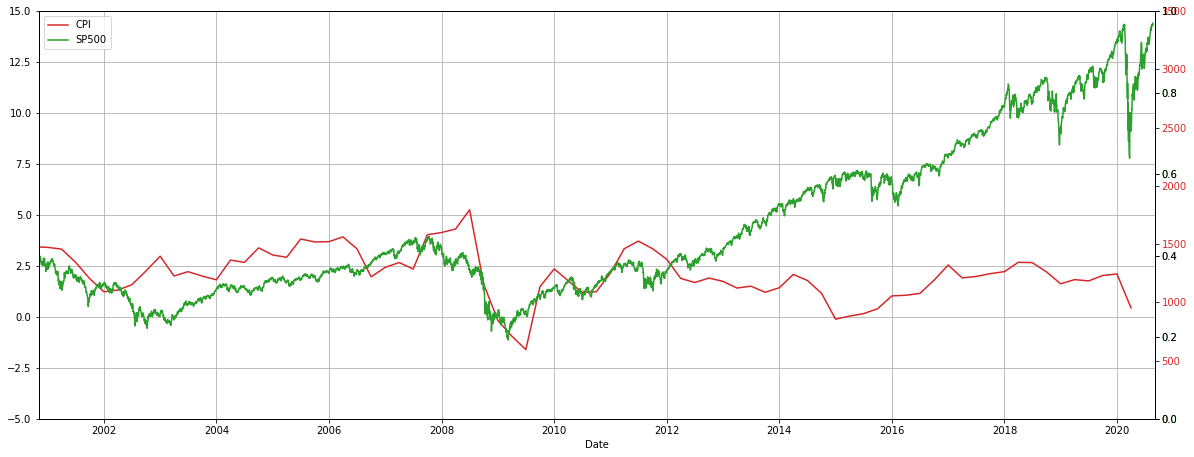

In [25]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 7.5))

ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()
ax4 = ax1.twinx()

color = 'tab:red'
ax1.plot(m2v.index, m2v['CPIAUCSL_PC1'], color=color, label="CPI")
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2.plot(sp.index, sp['Close'], color=color, label="SP500")
ax3.tick_params(axis='y', labelcolor=color)

 

ax1.set_ylim(-5, 15)
ax2.set_ylim(0, 3500)
ax1.grid(True)

ax1.set_xlim([datetime.date(2000, 11, 3), datetime.date(2020, 9, 1)])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.gca().get_legend_handles_labels()
plt.xticks(rotation=90)
plt.show()

Why do the two diverge in 2011?
<br>
<br>
We take a quick glance at the Fed's balance sheet...

In [21]:
bs = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=WALCL&scale=left&cosd=2002-12-18&coed=2020-08-19&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Weekly%2C%20As%20of%20Wednesday&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-08-22&revision_date=2020-08-22&nd=2002-12-18", index_col = "DATE", parse_dates=['DATE'])

bs = bs.dropna()
bs = bs[bs.WALCL != '.']

bs['WALCL'] = bs['WALCL'].astype(float)

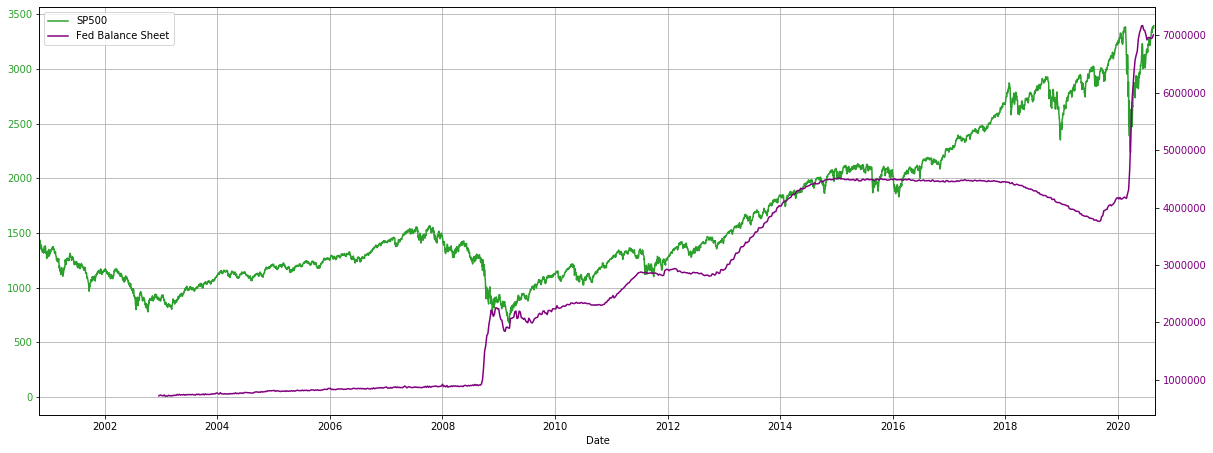

In [26]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 7.5))

ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:green'
ax1.plot(sp.index, sp['Close'], color=color, label='SP500')
ax1.tick_params(axis='y', labelcolor=color)

color = 'purple'
ax2.plot(bs.index, bs['WALCL'], color=color, label='Fed Balance Sheet')
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)

ax1.set_xlim([datetime.date(2000, 11, 3), datetime.date(2020, 9, 1)])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.gca().get_legend_handles_labels()
plt.xticks(rotation=90)
plt.show()

The balance sheet lift's the market by it's bootstraps
<br>
Notice the attempt at (fullfilling the 2009 promise) unwinding the balance sheet in 2018 didn't treat the market so well toward the end of the year
<br>
Looking at 2020, is it any surpise the market is blowing through record highs?

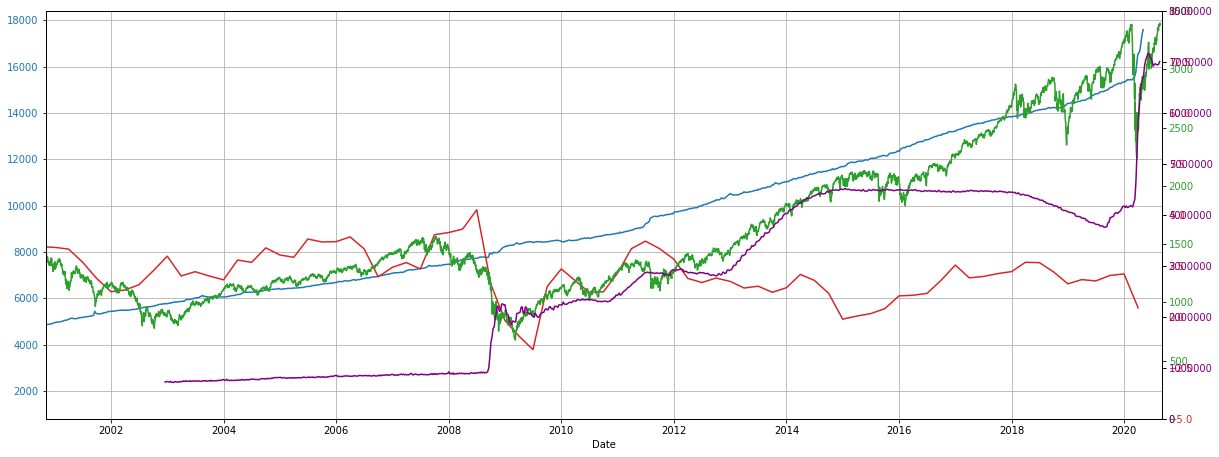

In [23]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 7.5))

ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()
ax4 = ax1.twinx()

color = 'tab:blue'
ax1.plot(m2.index, m2['M2'], color=color, label='M2')
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax2.plot(m2v.index, m2v['CPIAUCSL_PC1'], color=color, label='CPI')
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax3.plot(sp.index, sp['Close'], color=color, label='SP500')
ax3.tick_params(axis='y', labelcolor=color)

color = 'purple'
ax4.plot(bs.index, bs['WALCL'], color=color, label='')
ax4.tick_params(axis='y', labelcolor=color)
 

ax2.set_ylim(-5, 15)
ax3.set_ylim(0, 3500)
ax4.set_ylim(0, 8000000)
ax1.grid(True)

ax1.set_xlim([datetime.date(2000, 11, 3), datetime.date(2020, 9, 1)])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc="upper left")

plt.gca().get_legend_handles_labels()
plt.xticks(rotation=90)
plt.show()

Every time there is an event that causes significant deflationary pressure, the Federal Reserve combats the deflation by balooning their balance sheet (and now illegally buying corporate debt through the SMCCF) which launches markets higher through the sole the power of inflation. Remember, the Fed has 1 ability: to create currency and issue it as debt. This inflation eventually makes its way into markets.